<a href="https://colab.research.google.com/github/danish-khan962/Deep-Learning/blob/main/miscellaneous/08_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXERCISE 8**

Create a neural network model and visualize it using model.summary , distinct the layers and plot the model.

In [2]:
# Importing tensorflow
import tensorflow as tf
print("Tensorflow version we're using: ", tf.__version__)

Tensorflow version we're using:  2.18.0


In [3]:
# Importing other dependencies
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Creating features
X = tf.range(-50, 100, 2)  # from -50 to 100 with a step  of 2
X

<tf.Tensor: shape=(75,), dtype=int32, numpy=
array([-50, -48, -46, -44, -42, -40, -38, -36, -34, -32, -30, -28, -26,
       -24, -22, -20, -18, -16, -14, -12, -10,  -8,  -6,  -4,  -2,   0,
         2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98], dtype=int32)>

In [5]:
# Creating labels
y = X + 5
y

<tf.Tensor: shape=(75,), dtype=int32, numpy=
array([-45, -43, -41, -39, -37, -35, -33, -31, -29, -27, -25, -23, -21,
       -19, -17, -15, -13, -11,  -9,  -7,  -5,  -3,  -1,   1,   3,   5,
         7,   9,  11,  13,  15,  17,  19,  21,  23,  25,  27,  29,  31,
        33,  35,  37,  39,  41,  43,  45,  47,  49,  51,  53,  55,  57,
        59,  61,  63,  65,  67,  69,  71,  73,  75,  77,  79,  81,  83,
        85,  87,  89,  91,  93,  95,  97,  99, 101, 103], dtype=int32)>

In [6]:
# Checking if both have equal number of elements
len(X) == len(y)

True

In [8]:
# Converting features tensors and label tensors into float32 for no future problem
X = tf.cast(X, dtype=tf.float32)
y = tf.cast(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(75,), dtype=float32, numpy=
 array([-50., -48., -46., -44., -42., -40., -38., -36., -34., -32., -30.,
        -28., -26., -24., -22., -20., -18., -16., -14., -12., -10.,  -8.,
         -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,
         16.,  18.,  20.,  22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,
         38.,  40.,  42.,  44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,
         60.,  62.,  64.,  66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,
         82.,  84.,  86.,  88.,  90.,  92.,  94.,  96.,  98.],
       dtype=float32)>,
 <tf.Tensor: shape=(75,), dtype=float32, numpy=
 array([-45., -43., -41., -39., -37., -35., -33., -31., -29., -27., -25.,
        -23., -21., -19., -17., -15., -13., -11.,  -9.,  -7.,  -5.,  -3.,
         -1.,   1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,  19.,
         21.,  23.,  25.,  27.,  29.,  31.,  33.,  35.,  37.,  39.,  41.,
         43.,  45.,  47.,  49.,  51.,  53.,  55.,  57.,  59.,  61.,  63.,
   

### Visualizing the data points

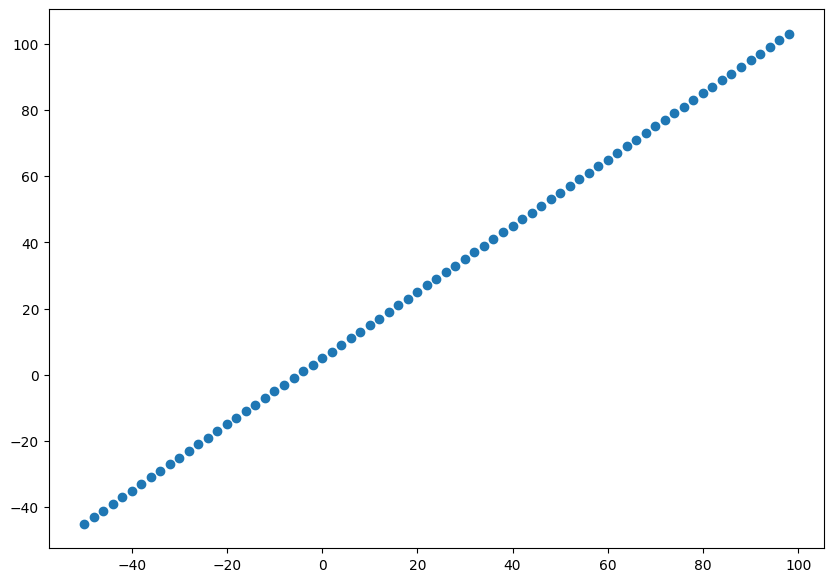

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(X, y)

### Splitting into Training and testing data

In [10]:
# Checking length of X
len(X)

75

In [11]:
# Splitting into training set
X_train = X[:60]
y_train = y[:60]

# Splitting into testing set
X_test = X[60:]
y_test = y[60:]

In [12]:
len(X_train), len(X_test), len(y_train), len(y_test)

(60, 15, 60, 15)

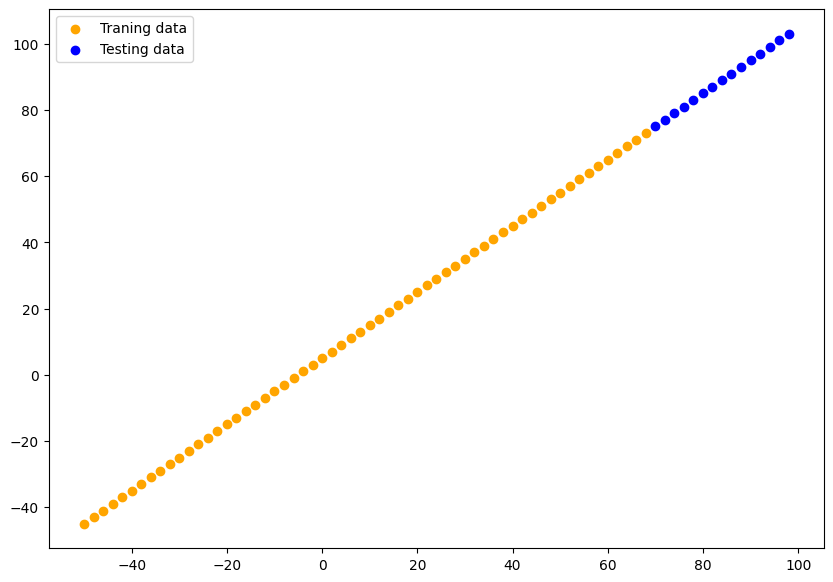

In [13]:
# Visualizing the training and testing data points
plt.figure(figsize=(10,7))

# Plotting training dataset
plt.scatter(X_train, y_train, c="orange", label="Traning data")

# Plotting testing data
plt.scatter(X_test, y_test, c="blue", label="Testing data")

plt.legend()

### Creating our model with distinct layer names

In [15]:
# Creating our model

# Setting random seed for reproducability
tf.random.set_seed(42)

# 1. Creating a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_shape=[1], name="input_layer_1"),
    tf.keras.layers.Dense(7, input_shape=[1], name="input_layer_2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="MODEL_ONE")

# 2. Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [16]:
# Getting summary of our model
model.summary()

Model: "MODEL_ONE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (Dense)           │ (None, 20)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input_layer_2 (Dense)           │ (None, 7)              │           147 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 195 (780.00 B)

 Trainable params: 195 (780.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Fitting our model to training set
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 21.8727 - mae: 21.8727 
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 26.2962 - mae: 26.2962
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.9344 - mae: 9.9344
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.8861 - mae: 6.8861
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 20.4815 - mae: 20.4815
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.1925 - mae: 11.1925
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.6806 - mae: 5.6806
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 16.6540 - mae: 16.6540
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 18.8413 - mae: 18.8413
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.4364 - mae: 5.4364
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 16.2678 - mae: 16.2678
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 18.0494 - mae: 18.0494
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━

### Visualizing or Plotting our model

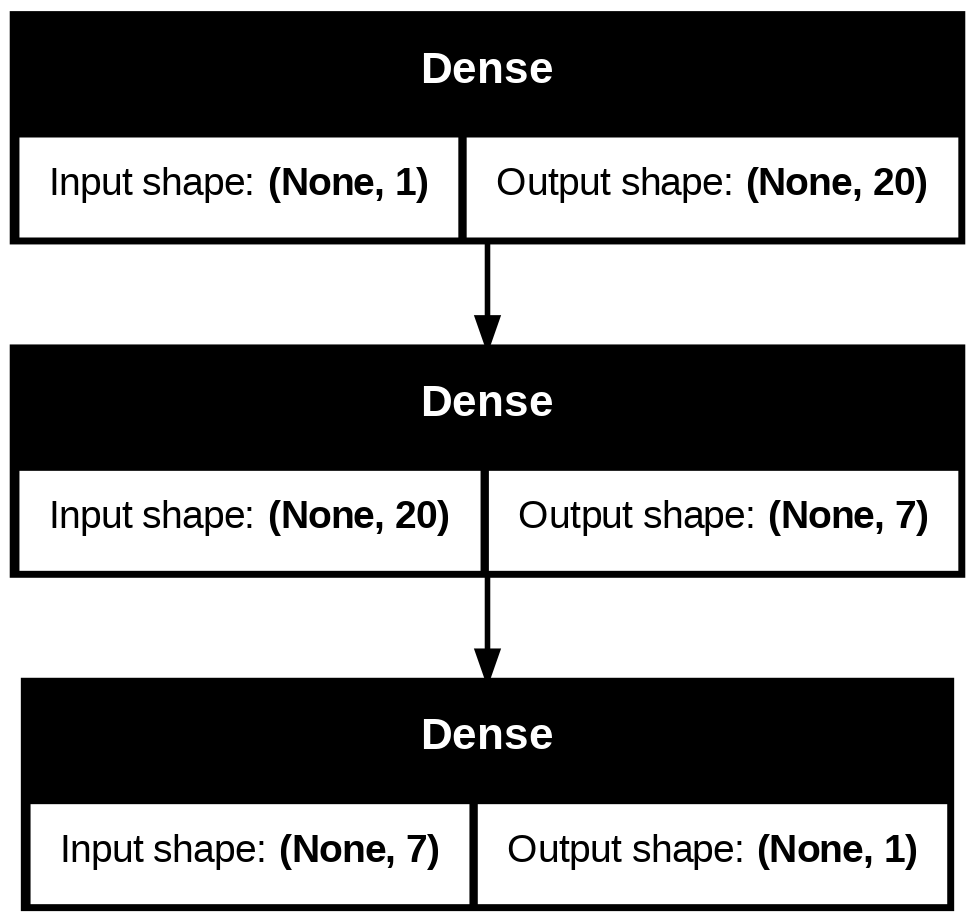

In [19]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)